In [1]:
from DOE_HER import load_data

In [2]:
from matplotlib.pyplot import rc

rc("font", **{"family": "sans-serif", "sans-serif": ["Arial"]})

In [3]:
exp_data = load_data.experimental_data()

In [4]:
Pt_df = exp_data[exp_data.Components == ("Pt", "X")]

In [5]:
from scipy.ndimage import gaussian_filter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def plot_max_rate(curve, x_pre=1, x_post=1, y_low=None, y_up=None, diff_window=5):
    curve = gaussian_filter(curve, sigma=2)
    dy = np.diff(curve)
    max_pos = np.argmax(dy)
    dy_max = np.amax(dy)
    x_plt = np.arange(max_pos - x_pre, max_pos + x_post)
    y = dy_max * (x_plt - max_pos) + curve[max_pos]
    if y_low != None:
        x_plt = x_plt[y > y_low]
        y = y[y > y_low]
    if y_up != None:
        x_plt = x_plt[y < y_up]
        y = y[y < y_up]
    return x_plt, y

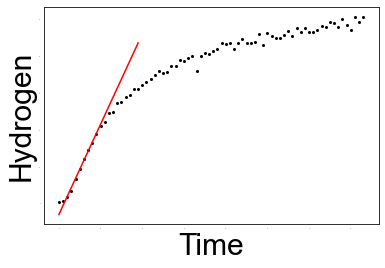

In [6]:
fig, ax = plt.subplots()
data = Pt_df[Pt_df.MaxRate == Pt_df.MaxRate.max()].Curve.iloc[0]
ax.plot(range(len(data)), data, "k.", markersize=4)
ax.plot(*plot_max_rate(data, x_pre=5, x_post=15), c="r")
plt.xlabel("Time", fontsize=30)
plt.ylabel("Hydrogen", fontsize=30)
plt.tick_params(size=0, labelsize=0)
fig.savefig(
    "../figures/graphical_abstract/grabs_her_curve.pdf", bbox_inches="tight", dpi=300
)

In [7]:
%run dataframe_generation.ipynb

100%|██████████| 253/253 [00:00<00:00, 666.41it/s]


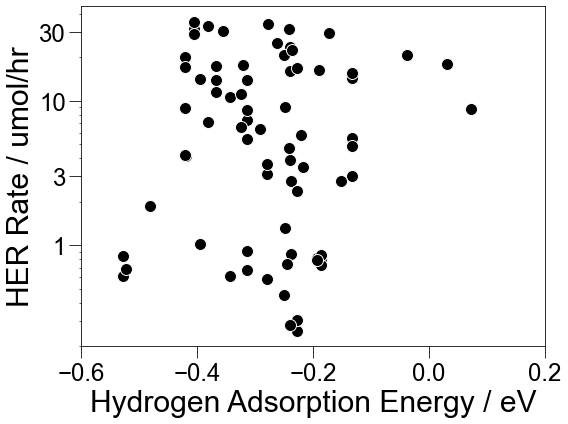

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.semilogy()
plot_df = exp_df
sns.scatterplot(
    data=plot_df,
    x="adsorption_energy_H",
    y="MaxRate",
    ax=ax,
    color="black",
    s=144,
)
ax.set_yticks([1, 3, 10, 30])
ax.set_yticklabels(["1", "3", "10", "30"])
ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks([-0.6, -0.4, -0.2, 0, 0.2])
ax.tick_params(axis="both", size=12, labelsize=24)
ax.set_xlim([-0.6, 0.2])
ax.set_xlabel("Hydrogen Adsorption Energy / eV", fontsize=30)
ax.set_ylabel("HER Rate / umol/hr", fontsize=30)

plt.tight_layout()
fig.savefig(
    "../figures/graphical_abstract/grabs_volcano_%s.pdf" % ads_model,
    bbox_inches="tight",
    dpi=300,
)